In [3]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Constants
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (255, 192, 203),
    (0, 125, 125),
    (255, 125, 125),
    (125, 255, 255),
    (255, 255, 125),
    (125, 255, 125),
    (255, 125, 255),
    (125, 125, 125),
    (125, 125, 0),
    (0, 125, 0)
    
]

4.1.1 

(3) In the given sequence (00-29) pick 15 cells. These cells are traced cells over the
sequence of the 30 images. Indicate your choices with a label/number in the initial
image. These labels are the result from a segmentation operation that successfully
find all the relevant, i.e. 15, cells in the image(s). Develop, apply, explain and motivate
your segmentation procedure.

In [82]:
# Read all 30 images from the controll experiment
images_ctrl = [np.mean(plt.imread(f"IAWAIM-P4/images/MTLn3-Ctrl00{'0' + str(i) if i < 10 else i}.tif"), -1).astype(np.uint16) for i in range(30)]

(512, 512)


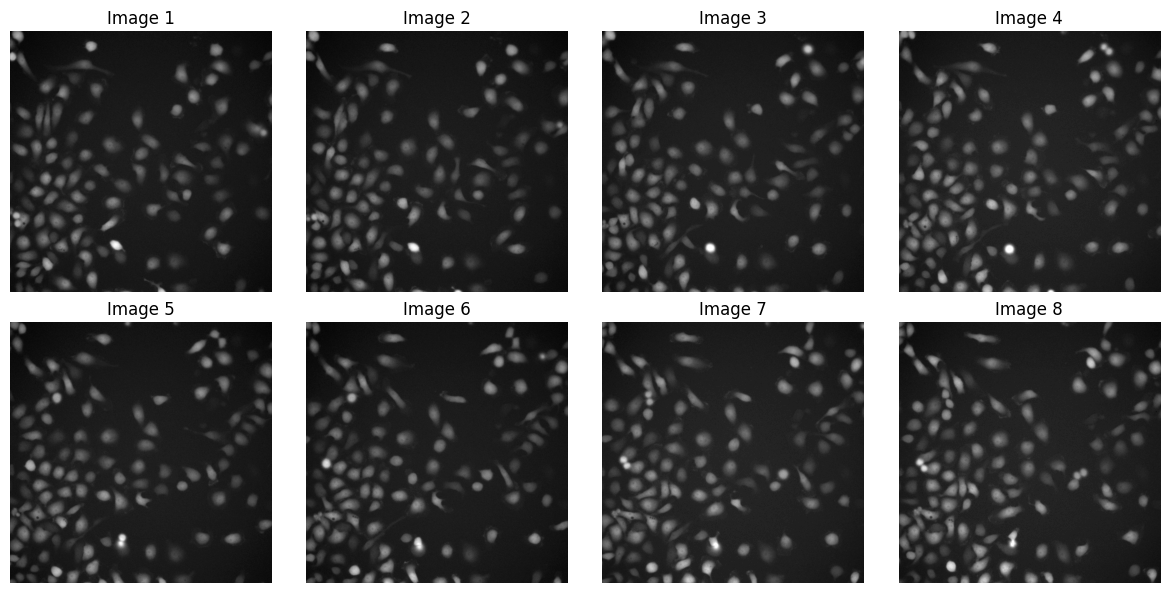

In [31]:
def display_eight(images, start=0):
    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))

    # Iterate over the image paths and corresponding axes
    for i, (image, ax) in enumerate(zip(images, axes.flat)):
        # Load and display the image on the current axis
        ax.imshow(image, cmap="gray")
        ax.axis('off')
        ax.set_title(f'Image {start+i+1}')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the figure
    plt.show()
    
display_eight(images_ctrl[:8])

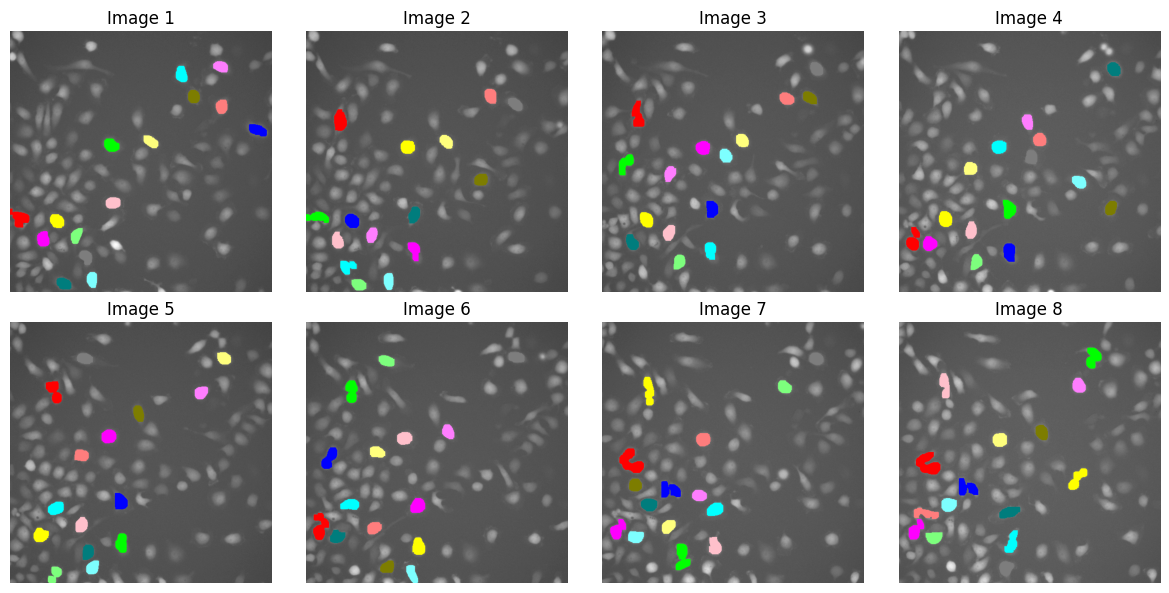

In [118]:
def segment_image(image):
    """
    Segment different cells in image. Note that many pipelines were tried, and just normalizing and thresholding worked best
    """
    original = image.copy()
    # Normalize
    image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)    
    
    # Open the image to remove small shapes
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (9,9)))
    
    # Threshold the image
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Convert to unsigned 8-bit integers
    image = image.astype(np.uint8)

    # Find the contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contours
    largest = sorted(contours, key=cv2.contourArea, reverse=True)[:15]
    
    color_image = np.zeros(image.shape + (3,)).astype(np.uint16)
    color_image = np.stack([original]*3, axis=-1).astype(np.uint16)
    
    for i, (contour, color) in zip(largest, colors):
        cv2.drawContours(color_image, [contour], -1, color=color, thickness=cv2.FILLED)
        cv2.putText(image, text= str(i+1), org=(cx,cy), fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0), 
                    thickness=2, lineType=cv2.LINE_AA)


    return color_image
    
thresholded_images = [segment_image(i) for i in images_ctrl]

display_eight(thresholded_images[:8])